# Solución Numérica de EDOs

- Jimena Hernandez/21199
- Mark Albrand/21004

## Crecimiento poblacional

*Considere el modelo de crecimiento logístico dado por la ecuación diferencial:*
```dp/dt = rP(1-P/K)```

*Use el método de 4to orden de Runge-Kutta para estimar la población sobre el tiempo y grafique los resultados. Interprete la gráfica y responda ¿cuál es el estimado de la población en tiempo T = 20?*

**El estimado de la población en el tiempo (20) es  68.**



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve 

In [8]:
def eq(r, p, k):
    return r*p*(1-p/k)

In [9]:
p_0 = 10  # Población inicial
r = 0.1  # ratio de crecimiento
k = 1_000  # Tamaño de paso
h = 0.1  # Tamaño de paso del tiempo
T = 20  # Tiempo de simulación

In [10]:
def runge_kutta(p_0: int, r: float, k: int, h: float, T: int) -> np.ndarray:
    """
    Función que implementa el método de Runge-Kutta de cuarto orden para resolver la ecuación diferencial
    :param p_0: Población inicial
    :param r: ratio de crecimiento
    :param k: Tamaño de paso
    :param h: Tamaño de paso del tiempo
    :param T: Tiempo de simulación
    :return: Array con la población en cada instante de tiempo
    """
    n = int(T/h) # Tamaño de paso en el tiempo Δt
    p = np.zeros(n) 
    p[0] = p_0 # Población inicial
    for i in range(1, n):
        k1 = h*eq(r, p[i-1], k) 
        k2 = h*eq(r, p[i-1] + k1/2, k)
        k3 = h*eq(r, p[i-1] + k2/2, k)
        k4 = h*eq(r, p[i-1] + k3, k)
        p[i] = p[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6 # Actualizando y 
    return p

print(f"p(20) = {(runge_kutta(p_0, r, k, h, T)[-1]):.2f}")

p(20) = 68.81


#### El estimado de la población en el tiempo T =20 es  68.81.


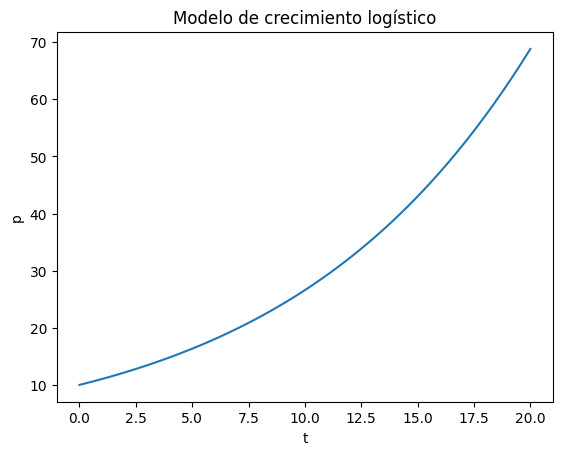

In [11]:
# graficar
p = runge_kutta(p_0, r, k, h, T)
t = np.linspace(0, T, int(T/h))
plt.plot(t, p)
plt.xlabel("t")
plt.ylabel("p")
plt.title("Modelo de crecimiento logístico")
plt.show()

## Depredador - Presa

*Utilice el método de cuarto orden de Runge-Kutta para estimar las poblaciones a lo largo del tiempo y trazar el resultado. Interprete las gráficas y responda ¿cuál es el estimado de las poblaciones en tiempo T = 50?*

**El estimado de las poblaciones en el tiempo (50) es de 3 presas y 1 depredador.**


In [17]:
# Modelo de Lotka-Volterra

R0 = 40 # Presa
P0 = 9 # Depredador
alpha = 0.1
beta = 0.02
delta = 0.01
gamma = 0.1
h = 0.1 # Tamaño de paso del tiempo
T = 50 # Tiempo Total


In [18]:
def dr_dt(alpha, beta, R, P):
    return alpha*R - beta*R*P

def dp_dt(delta, gamma, R, P):
    return delta*R*P - gamma*P

In [23]:
def depredador_pesa_RK(r: int, P_0: int, alpha: float, beta: float, delta: float, gamma: float, h: float, T: int) -> np.ndarray:
    """
    Función que implementa el método de Runge-Kutta de cuarto orden para resolver las ecuaciones de Lotka - Voltera
    :param r: Presa
    :param P0: Depredador
    :param alpha: Tasa de crecimiento de la presa
    :param beta: Tasa de mortalidad de la presa
    :param delta: Tasa de crecimiento del depredador
    :param gamma: Tasa de mortalidad del depredador
    :param h: Tamaño de paso del tiempo
    :param T: Tiempo de simulación
    :return: Array con la población de la presa y el depredador en cada instante de tiempo
    """
    n = int(T/h) # Tamaño de paso en el tiempo Δt
    P = np.zeros(n) 
    
    P[0] = P_0 # Población inicial del depredador
    
    R = np.zeros(n) 
    R[0] = r # Población inicial de la presa
    
    for i in range(1, n):
        k1 = h*dr_dt(alpha, beta, R[i-1], P[i-1])
        l1 = h*dp_dt(delta, gamma, R[i-1], P[i-1])
        
        k2 = h*dr_dt(alpha, beta, R[i-1] + k1/2, P[i-1] + l1/2)
        l2 = h*dp_dt(delta, gamma, R[i-1] + k1/2, P[i-1] + l1/2)
        
        k3 = h*dr_dt(alpha, beta, R[i-1] + k2/2, P[i-1] + l2/2)
        l3 = h*dp_dt(delta, gamma, R[i-1] + k2/2, P[i-1] + l2/2)
        
        k4 = h*dr_dt(alpha, beta, R[i-1] + k3, P[i-1] + l3)
        l4 = h*dp_dt(delta, gamma, R[i-1] + k3, P[i-1] + l3)
        
        R[i] = R[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6 # Actualizando y
        P[i] = P[i-1] + (l1 + 2*l2 + 2*l3 + l4)/6 # Actualizando y
    return R, P

R, P = depredador_pesa_RK(R0, P0, alpha, beta, delta, gamma, h, T)
print(f"R(50) = {R[-1]:.2f}")
print(f"P(50) = {P[-1]:.2f}")

R(50) = 3.04
P(50) = 0.54


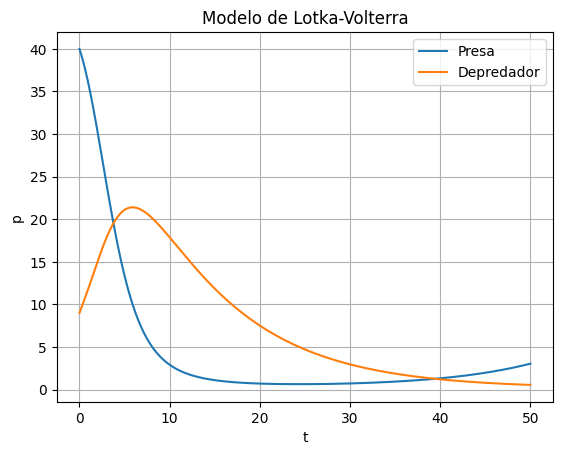

In [25]:
# graficar
t = np.linspace(0, T, int(T/h))
plt.plot(t, R, label="Presa")
plt.plot(t, P, label="Depredador")
plt.xlabel("t")
plt.ylabel("p")
plt.title("Modelo de Lotka-Volterra")
plt.legend()
plt.grid()
plt.show()